In [1]:
# %load Halpern_2015_3_3.py
import numpy as np
import pandas as pd
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout
from pprint import pformat as pf
from pprint import pprint as pp
import pickle

import pyphi
from pprint import pprint
from pyphi.convert import sbs2sbn, sbn2sbs   

pyphi.config.PARTITION_TYPE = 'ALL'
pyphi.config.PICK_SMALLEST_PURVIEW = True
pyphi.config.VALIDATE_SUBSYSTEM_STATES = False

# Suppose that a prisoner dies either if A loads B’s gun and B shoots, 
# or if C loads and shoots his gun.
# D = (A and B) or C
# Most intersting state: 101 -> 1. Here they don't want to say that 
# A was a cause of D.

# Constants
# ================================================================
NODES = 4
States = 2**NODES

INI_STATE = (1, 0, 1, 1)
cm = np.array([ [0, 0, 0, 1],
                [0, 0, 0, 1],
                [0, 0, 0, 1],
                [0, 0, 0, 0]
                ])

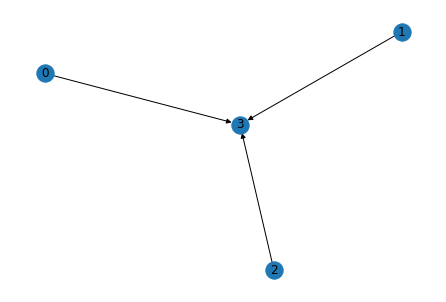

In [2]:
G = nx.DiGraph(cm)
nx.draw(G, pos=pydot_layout(G), with_labels=True)

In [3]:
# Functions
# ================================================================
def node_logic(ps):
    cs = [0.5 for i in range(NODES)]
    if ((ps[0] + ps[1] > 1) or (ps[2] > 0)):
        cs[3] = 1
    else:
        cs[3] = 0
    return cs

def state_evolution(inistate, reps):
    evo = list()
    evo.append(list(inistate))
    [evo.append(node_logic(evo[r])) for r in range(reps)]
    return np.array(evo)

In [4]:
# =================================================================
#! if __name__ == "__main__":

    tpm = np.zeros((States, NODES))  
    print(f'tpm.shape={tpm.shape} sbs.shape={sbn2sbs(tpm).shape}')
    pd.DataFrame(sbn2sbs(tpm))

tpm.shape=(16, 4) sbs.shape=(16, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
    for psi in range(States):
        ps = tuple(map(int, bin(psi)[2:].zfill(NODES)[::-1]))   
        print(f'ps={ps} before={tpm[psi, :]}', end= ' ')
        tpm[psi, :] = node_logic(ps)
        print(f'after={tpm[psi, :]}')
    pd.DataFrame(tpm)

ps=(0, 0, 0, 0) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 0. ]
ps=(1, 0, 0, 0) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 0. ]
ps=(0, 1, 0, 0) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 0. ]
ps=(1, 1, 0, 0) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 1. ]
ps=(0, 0, 1, 0) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 1. ]
ps=(1, 0, 1, 0) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 1. ]
ps=(0, 1, 1, 0) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 1. ]
ps=(1, 1, 1, 0) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 1. ]
ps=(0, 0, 0, 1) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 0. ]
ps=(1, 0, 0, 1) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 0. ]
ps=(0, 1, 0, 1) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 0. ]
ps=(1, 1, 0, 1) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 1. ]
ps=(0, 0, 1, 1) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 1. ]
ps=(1, 0, 1, 1) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 1. ]
ps=(0, 1, 1, 1) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 1. ]
ps=(1, 1, 1, 1) before=[0. 0. 0. 0.] after=[0.5 0.5 0.5 1. ]


,0,1,2,3
0,0.5,0.5,0.5,0.0
1,0.5,0.5,0.5,0.0
2,0.5,0.5,0.5,0.0
3,0.5,0.5,0.5,1.0
4,0.5,0.5,0.5,1.0
5,0.5,0.5,0.5,1.0
6,0.5,0.5,0.5,1.0
7,0.5,0.5,0.5,1.0
8,0.5,0.5,0.5,0.0
9,0.5,0.5,0.5,0.0


In [6]:
pd.DataFrame(sbn2sbs(tpm))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
8,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [7]:
    print(f'INI_STATE={INI_STATE}')
    state_evo = state_evolution(INI_STATE, 1)
    print(f'state_evo={state_evo}')
    print(f'tpm={tpm}')
    print('---------------------------')
    
    net = pyphi.Network(tpm, cm)

    ps = tuple([int(e > 0.5) for e in state_evo[0]])
    cs = tuple([int(e > 0.5) for e in state_evo[1]])
    print(f'ps={ps} cs={cs}')

    transition = pyphi.Transition(net, ps, cs, (0,1,2), (3,))  

INI_STATE=(1, 0, 1, 1)
state_evo=[[1.  0.  1.  1. ]
 [0.5 0.5 0.5 1. ]]
tpm=[[0.5 0.5 0.5 0. ]
 [0.5 0.5 0.5 0. ]
 [0.5 0.5 0.5 0. ]
 [0.5 0.5 0.5 1. ]
 [0.5 0.5 0.5 1. ]
 [0.5 0.5 0.5 1. ]
 [0.5 0.5 0.5 1. ]
 [0.5 0.5 0.5 1. ]
 [0.5 0.5 0.5 0. ]
 [0.5 0.5 0.5 0. ]
 [0.5 0.5 0.5 0. ]
 [0.5 0.5 0.5 1. ]
 [0.5 0.5 0.5 1. ]
 [0.5 0.5 0.5 1. ]
 [0.5 0.5 0.5 1. ]
 [0.5 0.5 0.5 1. ]]
---------------------------
ps=(1, 0, 1, 1) cs=(0, 0, 0, 1)


In [19]:
    print(f'transition.json=\n{pf(transition.to_json(),width=60)}')

transition.json=
{'after_state': (0, 0, 0, 1),
 'before_state': (1, 0, 1, 1),
 'cause_indices': (0, 1, 2),
 'cause_system': Subsystem(n0, n1, n2, n3),
 'cut': NullCut((0, 1, 2, 3)),
 'effect_indices': (3,),
 'effect_system': Subsystem(n0, n1, n2, n3),
 'network': '<Network() 4514757931360610548',
 'node_indices': (0, 1, 2, 3),
 'node_labels': NodeLabels(('n0', 'n1', 'n2', 'n3')),
 'system': {<Direction.CAUSE: 0>: Subsystem(n0, n1, n2, n3),
            <Direction.EFFECT: 1>: Subsystem(n0, n1, n2, n3)}}


In [9]:
# See: pyphi.org: CODE/Transition
tr = transition
print(f'''
ps={ps} cs={cs} 
before_state={tr.before_state} after_state={tr.after_state}
cause_system={tr.cause_system} effect_system={tr.effect_system} 
system={tr.system}
cut={tr.cut}
''')


ps=(1, 0, 1, 1) cs=(0, 0, 0, 1) 
before_state=(1, 0, 1, 1) after_state=(0, 0, 0, 1)
cause_system=Subsystem(n0, n1, n2, n3) effect_system=Subsystem(n0, n1, n2, n3) 
system={<Direction.CAUSE: 0>: Subsystem(n0, n1, n2, n3), <Direction.EFFECT: 1>: Subsystem(n0, n1, n2, n3)}
cut=NullCut((0, 1, 2, 3))



In [10]:
    account = pyphi.actual.account(transition)

In [11]:

print(f'''
account={account}

account.causal_links({len(account.causal_links)})={account.causal_links}

account.causal_links[0]={account.causal_links[0]}

account.causal_links[0].extended_purview={account.causal_links[0]._extended_purview}

account.causal_links[0].alpha={account.causal_links[0].alpha}

account.causal_links[0]._ria={account.causal_links[0]._ria}; \n{dir(account.causal_links[0]._ria)}

account.causal_links[0]._ria.to_json()=\n{pf(account.causal_links[0]._ria.to_json())}

account.causal_links[0].ria.partition({len(account.causal_links[0].ria.partition)})={list(account.causal_links[0].ria.partition)}

account.causal_links[0].ria.partition[0]={account.causal_links[0]._ria.partition[0]}
account.causal_links[0].ria.partition[1]={account.causal_links[0]._ria.partition[1]}

account.causal_links[0].ria.partition.json={account.causal_links[0]._ria.partition.to_json()}
''')
#dir.account={dir(account)}
#### Following have built in Pretty Printing that obscures structure
# account.causal_links[0].ria={account.causal_links[0]._ria}
#account.causal_links[0].ria.json={account.causal_links[0]._ria.to_json()}
#account.causal_links[0].ria.partition={account.causal_links[0]._ria.partition}


account=<pyphi.models.actual_causation.Account object at 0x7fb0233493c8>

account.causal_links(3)=(<pyphi.models.actual_causation.CausalLink object at 0x7fb0009a8b00>, <pyphi.models.actual_causation.CausalLink object at 0x7fb02335e320>, <pyphi.models.actual_causation.CausalLink object at 0x7fb023353e48>)

account.causal_links[0]=<pyphi.models.actual_causation.CausalLink object at 0x7fb0009a8b00>

account.causal_links[0].extended_purview=((2,),)

account.causal_links[0].alpha=0.678072

account.causal_links[0]._ria=<pyphi.models.actual_causation.AcRepertoireIrreducibilityAnalysis object at 0x7fb02335ec88>; 
['__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', 'alpha', 'direct

In [12]:
with open('account.pkl', 'wb') as f:
    pickle.dump(account, f)
print(f'account.to_json()=\n{pf(account.to_json(), width=1)}')
# HERE!!!

account.to_json()=
[{'CausalLink': {'alpha': 0.678072,
                 'extended_purview': ((2,),),
                 'ria': {'.': 'AcRepertoireIrreducibilityAnalysis',
                         'alpha': 0.678072,
                         'direction': 'CAUSE',
                         'mechanism': (3,),
                         'partition': [{'mechanism': (3,),
                                        'purview': ()},
                                       {'mechanism': (),
                                        'purview': (2,)}],
                         'partitioned_probability': 0.5,
                         'probability': 0.8,
                         'purview': (2,),
                         'state': (0,
                                   0,
                                   0,
                                   1)}}},
 {'CausalLink': {'alpha': 0.263034,
                 'extended_purview': ((3,),),
                 'ria': {'.': 'AcRepertoireIrreducibilityAnalysis',
               

In [13]:
    #import pdb; pdb.set_trace() 
    print('---------------------------')

    all_accounts = pyphi.actual.nexus(net, ps, cs)
    all_accounts = sorted(all_accounts, key=lambda nexus: nexus.alpha, reverse=True)

    pprint([(a.transition, a.alpha) for a in all_accounts])
    # print(nexi[0])
    # ac.context_print_mice(nexi[0].context)

    #import pdb; pdb.set_trace() 

---------------------------
[(<pyphi.actual.Transition object at 0x7fb023371b00>, 2.0)]


In [14]:
net.tpm.shape 
# first 4 dims are state of Node(1,2,3,4) at t
# last dim is prob of Node(1,2,3,4) being ON at t+1
# ESSENTIALY 2d(state, prob-vector)
# This can only support binary nodes because prob-vector is for single state 
# (other binary state = 1-prob)

(2, 2, 2, 2, 4)

In [15]:
pd.DataFrame(sbn2sbs(net.tpm))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
8,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [16]:
tpm.size

64

In [17]:
import pyphi.data_models as dm  # Prototype code
tpm2 = dm.TransProb()

sbs = sbn2sbs(tpm)
print(f'shape={sbs.shape}')
tpm2.from_legacy(sbs, labels=('ABCD'))
tpm2.df
pd.DataFrame(tpm)

shape=(16, 16)


,0,1,2,3
0,0.5,0.5,0.5,0.0
1,0.5,0.5,0.5,0.0
2,0.5,0.5,0.5,0.0
3,0.5,0.5,0.5,1.0
4,0.5,0.5,0.5,1.0
5,0.5,0.5,0.5,1.0
6,0.5,0.5,0.5,1.0
7,0.5,0.5,0.5,1.0
8,0.5,0.5,0.5,0.0
9,0.5,0.5,0.5,0.0
